**<H1>Versuch 368: Beugung und Interferenz</H1>**

In [20]:
import sys
import os
import sympy as sp
import numpy as np
import pandas as pd

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', '..', '..')))
import setup_paths




from scientific_error_rounder import runden_und_speichern
from gauss_fehlerfortpflanzung import evaluate_gaussian_error
from gauss_fehlerfortpflanzung import gaussian_error_propagation
from geraden_fit import geraden_fit
from mean_calc_w_err import err_weighted_mean
from tabelle import tabellen_ersteller
from geraden_fit_config import config_1

**<H1>Versuch 368: Beugung und Interferenz</H1>**

<H2>Versuchsteil 1: Einzelspalt</H2>

**<H4>366.b:** Bestimmung der Wellenlänge</H4>

In [3]:
# Es muss nun 1/D_B für den Plot bestimmt werden
var_names=[m, x_p, x_m, D, f]=sp.symbols('m x_p x_m D f')
formula_list=[
	m, 
	(x_p-x_m)/2
    ]
evaluate_gaussian_error('b_mess.csv',formulas=formula_list, variables=var_names, result_length=10,result_names=['m', 'x_m [mm]'], output_file_suffix='xm')
runden_und_speichern('b_mess_xm.csv')

sqrt((del_m)**2 + (0)**2 + (0)**2 + (0)**2 + (0)**2)
sqrt((0)**2 + (del_x_p/2)**2 + (-del_x_m/2)**2 + (0)**2 + (0)**2)
Zeile 1: [1.0, 1e-07, 3.2, 0.3535533906]
Zeile 2: [2.0, 1e-07, 6.05, 0.3535533906]
Zeile 3: [3.0, 1e-07, 9.05, 0.3535533906]
Zeile 4: [4.0, 1e-07, 12.05, 0.3535533906]
Auswertung abgeschlossen. Ergebnisse wurden in 'b_mess_xm.csv' gespeichert.
Die gerundeten Daten wurden in der CSV-Datei "b_mess_xm_rounded.csv" gespeichert.


Da es sich hier um die Beugungsminima handelt, muss gelten:
$I(\alpha_m)=I_0 \cdot \frac{\sin^2(q)}{q^2} \stackrel{!}{=} 0~~ \Rightarrow ~~ \sin(q)=0 ~~ \Rightarrow ~~ q=\frac{\pi D \sin(\alpha_m)}{\lambda} \stackrel{!}{=}m\cdot \pi$

$\Leftrightarrow \sin(\alpha_m) \cdot f= \frac{m\lambda}{D} \cdot f \approx x_m$

$\Rightarrow \lambda = m' \cdot \frac {D}{f}~~~$ wobei $m'$ die Steigung der Regressionsgeraden ist, wenn man $x_m$ gegen $x$ aufträgt.

2.954999999999999 2.955000000000001
Fit-Ergebnisse für :
Schwerpunkt: (2.50000000 ± 0.00000010, 7.6 ± 0.4)
Steigung: 2.95 ± 0.16
Y-Achsenabschnitt: 0.2 ± 0.4



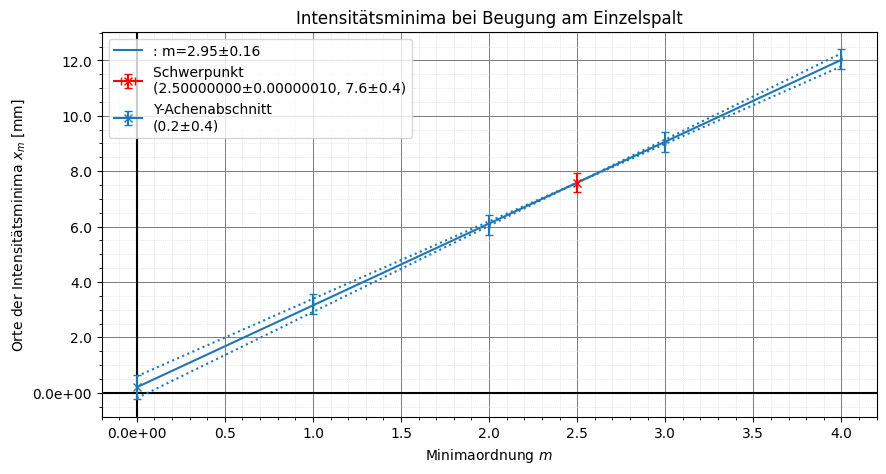

In [22]:
geraden_fit('b_mess_xm.csv', title='Intensitätsminima bei Beugung am Einzelspalt',
			x_label=r'Minimaordnung $m$', y_label=r'Orte der Intensitätsminima $x_m$ [mm]', plot_formula=False, y_labels=[''],
			save=True, linear_fit=True, focus_point=True, plot_y_inter=True, legendlocation='upper left', #y_decimal_places=3, x_axis=1.6, x_axis=400,
			y_major_ticks=2, y_minor_ticks=0.5, x_major_ticks=0.5, x_minor_ticks=0.1
			)

In [5]:
var_names=[D, f, m]=sp.symbols('D f m')
formula=m*D/f
gaussian_error_propagation(formula, ((D,0.1e-3,0.001e-3),(f,0.5,0),(m,2.94e-3,0.16e-3)))

Formel: D*m/f
Werte: ((D, 0.0001, 1e-06), (f, 0.5, 0), (m, 0.00294, 0.00016)) 

Formelwert: 5.88000000000000E-7

Fehlerformel: sqrt((del_D*m/f)**2 + (D*del_m/f)**2)
Fehler: 3.25357403481156E-8 
Ergebnis: 5.9e-07±3e-08
Das Ergebnis hat eine Genauigkeit von 5.085%


***Falls*** ich mir hier die Brennweite falsch (also 10cm statt eigentich 50cm) notiert habe, erhalten wir eine Wellenlänge von
$\lambda \pm \Delta \lambda= (590 \pm 40) nm$

**<H4>366.c:** Bestimmung der Spaltbreite, bei der die Streifen verschwinden</H4>

Die optische Vergrößerung berechnet sich durch
$ ~~ \frac{b}{g}=\frac{B}{G} ~ \Leftrightarrow ~ G = B\cdot \frac{g}{b} \equiv d_0$

In [7]:
var_names=[b, g, B]=sp.symbols('b g B')
formula=g * B / b
gaussian_error_propagation(formula, ((g,10,0.3),(B,2.5,0.1),(b,235,0.5)))

# d_0 Ergebnis in cm

Formel: B*g/b
Werte: ((g, 10, 0.3), (B, 2.5, 0.1), (b, 235, 0.5)) 

Formelwert: 0.106382978723404

Fehlerformel: sqrt((B*del_g/b)**2 + (del_B*g/b)**2 + (-B*del_b*g/b**2)**2)
Fehler: 0.00532396264659985 
Ergebnis: 0.106±0.005
Das Ergebnis hat eine Genauigkeit von 4.717%


Damit die räumlich Kohärenzbedingung erfüllt ist, muss folgende Beziehung gelten:

$d  D \ll 2 \cdot \lambda L ~\Leftrightarrow ~ \frac{d  D}{2 \cdot \lambda} \ll L$

In [13]:
var_names=[d, D, lam]=sp.symbols('d D lam')
formula=d*D/(2*lam)
gaussian_error_propagation(formula, ((d,1.06e-3,0.05e-3),(D,0.1e-3,0.001e-3),(lam,590e-9,40e-9))) #Ergebnis in m

Formel: D*d/(2*lam)
Werte: ((d, 0.00106, 5e-05), (D, 0.0001, 1e-06), (lam, 5.9e-07, 4e-08)) 

Formelwert: 0.0898305084745763

Fehlerformel: sqrt((D*del_d/(2*lam))**2 + (d*del_D/(2*lam))**2 + (-D*d*del_lam/(2*lam**2))**2)
Fehler: 0.00747342940670783 
Ergebnis: 0.09±0.007
Das Ergebnis hat eine Genauigkeit von 7.778%


<H2>Versuchsteil 2: Gitter</H2>

**<H4>366.d:** Bestimmung der Gitterkonstante anhand der grünen Spektrallinie</H4>

In [24]:
# Es muss nun 1/D_B für den Plot bestimmt werden
var_names=[m, alpha_r, alpha_l, r]=sp.symbols('m alpha_r alpha_l r')
formula_list=[
	m,
    (alpha_l-alpha_r)/2
    ]
evaluate_gaussian_error('d_mess.csv',formulas=formula_list, variables=var_names, result_length=10,result_names=['m', 'phi [rad]'], output_file_suffix='phi')

sqrt((del_m)**2 + (0)**2 + (0)**2 + (0)**2)
sqrt((0)**2 + (-del_alpha_r/2)**2 + (del_alpha_l/2)**2 + (0)**2)
Zeile 1: [1.0, 0.0, 0.0543, 0.0003535534]
Zeile 2: [2.0, 0.0, 0.10895, 0.0003535534]
Zeile 3: [3.0, 0.0, 0.1637, 0.0003535534]
Zeile 4: [4.0, 0.0, 0.2188, 0.0003535534]
Zeile 5: [5.0, 0.0, 0.2745, 0.0003535534]
Zeile 6: [6.0, 0.0, 0.331, 0.0003535534]
Zeile 7: [7.0, 0.0, 0.3887, 0.0007071068]
Zeile 8: [8.0, 0.0, 0.4477, 0.0007071068]
Zeile 9: [9.0, 0.0, 0.5085, 0.0014142136]
Auswertung abgeschlossen. Ergebnisse wurden in 'd_mess_phi.csv' gespeichert.


Es gilt:

$m \cdot \lambda = 2g \cdot \sin(\frac{\varphi_m}{2}) ~ \Leftrightarrow ~ g_m=\frac{m\cdot \lambda}{2\cdot \sin(\frac{\varphi_m}{2})}$

Für das grüne Licht der Wellenlänge $\lambda=546,07 \, nm$ folgt:

In [25]:
# Es muss nun 1/D_B für den Plot bestimmt werden
lamb=546.07e-9
var_names=[m, phi]=sp.symbols('m phi')
formula_list=[
	m,
    phi,
	m*lamb/(2*sp.sin(phi/2))
    ]
evaluate_gaussian_error('d_mess_phi.csv',formulas=formula_list, variables=var_names, result_length=10,result_names=['m', 'phi [rad]', 'g_m [m]'], output_file_suffix='g')
runden_und_speichern('d_mess_phi_g.csv')

sqrt((del_m)**2 + (0)**2)
sqrt((0)**2 + (del_phi)**2)
sqrt((2.73035e-7*del_m/sin(phi/2))**2 + (-1.365175e-7*del_phi*m*cos(phi/2)/sin(phi/2)**2)**2)
Zeile 1: [1.0, 0.0, 0.0543, 0.0003535534, 1.00578e-05, 6.55e-08]
Zeile 2: [2.0, 0.0, 0.10895, 0.0003535534, 1.00292e-05, 3.25e-08]
Zeile 3: [3.0, 0.0, 0.1637, 0.0003535534, 1.00186e-05, 2.16e-08]
Zeile 4: [4.0, 0.0, 0.2188, 0.0003535534, 1.00029e-05, 1.61e-08]
Zeile 5: [5.0, 0.0, 0.2745, 0.0003535534, 9.9779e-06, 1.28e-08]
Zeile 6: [6.0, 0.0, 0.331, 0.0003535534, 9.9439e-06, 1.05e-08]
Zeile 7: [7.0, 0.0, 0.3887, 0.0007071068, 9.8962e-06, 1.78e-08]
Zeile 8: [8.0, 0.0, 0.4477, 0.0007071068, 9.8398e-06, 1.53e-08]
Zeile 9: [9.0, 0.0, 0.5085, 0.0014142136, 9.7699e-06, 2.66e-08]
Auswertung abgeschlossen. Ergebnisse wurden in 'd_mess_phi_g.csv' gespeichert.
Die gerundeten Daten wurden in der CSV-Datei "d_mess_phi_g_rounded.csv" gespeichert.


In [26]:
err_weighted_mean('d_mess_phi_g_rounded.txt', value_col=4, error_col=5, result_length=10)

(9.9407e-06, 5.8e-09)

Die Gitterkonstante für die grüne Spektrallinie ($\lambda=546,07 \, nm$) wurde auf $g \pm \Delta g \approx (9941 \pm 6) \cdot 10^{-9} \, m= (9.941 \pm 0.006) \, \mu m$ bestimmt.

**<H4>366.e:** Bestimmung der Wellenlänge der blauen Spektrallinie</H4>

In [ ]:
# Es muss nun 1/D_B für den Plot bestimmt werden
var_names=[m, alpha_r, alpha_l, g]=sp.symbols('m alpha_r alpha_l g')
formula_list=[
	m,
    (alpha_l-alpha_r)/2,
	g
    ]
evaluate_gaussian_error('e_mess.csv',formulas=formula_list, variables=var_names, result_length=10,result_names=['m', 'phi [rad]', 'g [m]'], output_file_suffix='phi')

sqrt((del_m)**2 + (0)**2 + (0)**2 + (0)**2)
sqrt((0)**2 + (-del_alpha_r/2)**2 + (del_alpha_l/2)**2 + (0)**2)
sqrt((0)**2 + (0)**2 + (0)**2 + (del_g)**2)
Zeile 1: [1.0, 0.0, 0.04355, 0.0003535534, 9.941e-06, 6e-09]
Zeile 2: [2.0, 0.0, 0.08695, 0.0003535534, 9.941e-06, 6e-09]
Zeile 3: [3.0, 0.0, 0.1308, 0.0003535534, 9.941e-06, 6e-09]
Zeile 4: [4.0, 0.0, 0.1746, 0.0003535534, 9.941e-06, 6e-09]
Zeile 5: [5.0, 0.0, 0.2191, 0.0003535534, 9.941e-06, 6e-09]
Zeile 6: [6.0, 0.0, 0.2637, 0.0003535534, 9.941e-06, 6e-09]
Zeile 7: [7.0, 0.0, 0.309, 0.0007071068, 9.941e-06, 6e-09]
Zeile 8: [8.0, 0.0, 0.35505, 0.0007071068, 9.941e-06, 6e-09]
Zeile 9: [9.0, 0.0, 0.40165, 0.0007071068, 9.941e-06, 6e-09]
Zeile 10: [10.0, 0.0, 0.44975, 0.0014142136, 9.941e-06, 6e-09]
Zeile 11: [11.0, 0.0, 0.49815, 0.0014142136, 9.941e-06, 6e-09]
Auswertung abgeschlossen. Ergebnisse wurden in 'e_mess_phi.csv' gespeichert.


Nun gilt:

$m \cdot \lambda = 2g \cdot \sin(\frac{\varphi_m}{2}) ~ \Leftrightarrow ~ \lambda_m=\frac{2g \cdot \sin(\frac{\varphi_m}{2})}{m}$

Mit der berechneten Gitterkonstante $g \pm \Delta g \approx (9.941 \pm 0.006) \, \mu m$ folgt:

In [30]:
# Es muss nun 1/D_B für den Plot bestimmt werden
lamb=546.07e-9
var_names=[m, phi, g]=sp.symbols('m phi g')
formula_list=[
	m,
    phi,
	2*g*sp.sin(phi/2)/m
    ]
evaluate_gaussian_error('e_mess_phi.csv',formulas=formula_list, variables=var_names, result_length=10,result_names=['m', 'phi [rad]', 'lambda [m]'], output_file_suffix='lambda')
runden_und_speichern('e_mess_phi_lambda.csv')

sqrt((del_m)**2 + (0)**2 + (0)**2)
sqrt((0)**2 + (del_phi)**2 + (0)**2)
sqrt((-2*del_m*g*sin(phi/2)/m**2)**2 + (del_phi*g*cos(phi/2)/m)**2 + (2*del_g*sin(phi/2)/m)**2)
Zeile 1: [1.0, 0.0, 0.04355, 0.0003535534, 4.329e-07, 3.5e-09]
Zeile 2: [2.0, 0.0, 0.08695, 0.0003535534, 4.32e-07, 1.8e-09]
Zeile 3: [3.0, 0.0, 0.1308, 0.0003535534, 4.331e-07, 1.2e-09]
Zeile 4: [4.0, 0.0, 0.1746, 0.0003535534, 4.334e-07, 9e-10]
Zeile 5: [5.0, 0.0, 0.2191, 0.0003535534, 4.347e-07, 7e-10]
Zeile 6: [6.0, 0.0, 0.2637, 0.0003535534, 4.356e-07, 6e-10]
Zeile 7: [7.0, 0.0, 0.309, 0.0007071068, 4.371e-07, 1e-09]
Zeile 8: [8.0, 0.0, 0.35505, 0.0007071068, 4.389e-07, 9e-10]
Zeile 9: [9.0, 0.0, 0.40165, 0.0007071068, 4.407e-07, 8e-10]
Zeile 10: [10.0, 0.0, 0.44975, 0.0014142136, 4.433e-07, 1.4e-09]
Zeile 11: [11.0, 0.0, 0.49815, 0.0014142136, 4.456e-07, 1.3e-09]
Auswertung abgeschlossen. Ergebnisse wurden in 'e_mess_phi_lambda.csv' gespeichert.
Die gerundeten Daten wurden in der CSV-Datei "e_mess_phi_lambda_rounde

In [33]:
err_weighted_mean('e_mess_phi_lambda_rounded.txt', value_col=4, error_col=5, result_length=11)

(4.3692e-07, 2.9e-10)

Die Wellenlänge der blauen Spektrallinie wurde auf $\lambda \pm \Delta \lambda \approx (4.3692 \pm 0.0030) \cdot 10^{-7} \, m= (436.92 \pm 0.30) \,  nm$ bestimmt.

**<H4>366.f:** Nachweis der Auflösungsvermögen-Ordnung-Strichzahl-Beziehung</H4>

$A=\lambda/\Delta \lambda = m \cdot N$

In [47]:
# Bestimmung des Auflösungsvermögen
lam, dlam=578.01e-9, 2.1e-9

A=lam/dlam

print(f'Das Auflösungsvermögen liegt bei A={round(A,3)}')

Das Auflösungsvermögen liegt bei A=275.243


Für die Spaltzahl gilt nun $N=\left \lfloor \frac{G}{g} \right \rfloor$, wobei $g$ die Gitterkonstante ist (nicht mit der Gegenstandsseite zu verwechseln!)

Hierbei berechnet sich die Gegenstandsgröße durch $ ~~ \frac{b}{g}=\frac{B}{G} ~ \Leftrightarrow ~ G = B\cdot \frac{g}{b}$

In [52]:
var_names=[m, b, g_geg, B, g_git]=sp.symbols('m b g_geg B g_git')
formula_list=[
	m, b, g_geg, B, g_git,
	B*g_geg/b
    ]
evaluate_gaussian_error('f_mess.csv',formulas=formula_list, variables=var_names, result_length=10,result_names=['m', 'b[cm]', 'g_geg[cm]', 'B[cm]', 'g_git [cm]', 'G [cm]'], output_file_suffix='G')
runden_und_speichern('f_mess_G.csv')

sqrt((del_m)**2 + (0)**2 + (0)**2 + (0)**2 + (0)**2)
sqrt((0)**2 + (del_b)**2 + (0)**2 + (0)**2 + (0)**2)
sqrt((0)**2 + (0)**2 + (del_g_geg)**2 + (0)**2 + (0)**2)
sqrt((0)**2 + (0)**2 + (0)**2 + (del_B)**2 + (0)**2)
sqrt((0)**2 + (0)**2 + (0)**2 + (0)**2 + (del_g_git)**2)
sqrt((0)**2 + (-B*del_b*g_geg/b**2)**2 + (B*del_g_geg/b)**2 + (del_B*g_geg/b)**2 + (0)**2)
Zeile 1: [2.0, 0.0, 247.7, 3.0, 9.6, 1.0, 2.3, 0.3, 0.00099407, 5.8e-07, 0.0891400888, 0.0149188165]
Zeile 2: [4.0, 0.0, 247.7, 3.0, 9.6, 1.0, 1.0, 0.2, 0.00099407, 5.8e-07, 0.0387565604, 0.0087522389]
Zeile 3: [7.0, 0.0, 247.7, 3.0, 9.6, 1.0, 0.4, 0.15, 0.00099407, 5.8e-07, 0.0155026241, 0.0060365232]
Auswertung abgeschlossen. Ergebnisse wurden in 'f_mess_G.csv' gespeichert.
Die gerundeten Daten wurden in der CSV-Datei "f_mess_G_rounded.csv" gespeichert.


In [61]:
var_names=[m, b, g_geg, B, g_git, G]=sp.symbols('m b g_geg B g_git G')
formula_list=[
	m, b, g_geg, B, g_git, G,
	G/g_git
    ]
evaluate_gaussian_error('f_mess_G.csv',formulas=formula_list, variables=var_names, result_length=10,result_names=['m', 'b[cm]', 'g_geg[cm]', 'B[cm]', 'g_git [cm]', 'G [cm]', 'N_over'], output_file_suffix='N')
runden_und_speichern('f_mess_G_N.csv') #ACHTUNG: N muss hier händisch abgerundet werden!

sqrt((del_m)**2 + (0)**2 + (0)**2 + (0)**2 + (0)**2 + (0)**2)
sqrt((0)**2 + (del_b)**2 + (0)**2 + (0)**2 + (0)**2 + (0)**2)
sqrt((0)**2 + (0)**2 + (del_g_geg)**2 + (0)**2 + (0)**2 + (0)**2)
sqrt((0)**2 + (0)**2 + (0)**2 + (del_B)**2 + (0)**2 + (0)**2)
sqrt((0)**2 + (0)**2 + (0)**2 + (0)**2 + (del_g_git)**2 + (0)**2)
sqrt((0)**2 + (0)**2 + (0)**2 + (0)**2 + (0)**2 + (del_G)**2)
sqrt((0)**2 + (0)**2 + (0)**2 + (0)**2 + (-G*del_g_git/g_git**2)**2 + (del_G/g_git)**2)
Zeile 1: [2.0, 0.0, 247.7, 3.0, 9.6, 1.0, 2.3, 0.3, 0.00099407, 5.8e-07, 0.0891400888, 0.0149188165, 89.671842828, 15.0079040281]
Zeile 2: [4.0, 0.0, 247.7, 3.0, 9.6, 1.0, 1.0, 0.2, 0.00099407, 5.8e-07, 0.0387565604, 0.0087522389, 38.9877578038, 8.8044786706]
Zeile 3: [7.0, 0.0, 247.7, 3.0, 9.6, 1.0, 0.4, 0.15, 0.00099407, 5.8e-07, 0.0155026241, 0.0060365232, 15.5951030612, 6.0725401397]
Auswertung abgeschlossen. Ergebnisse wurden in 'f_mess_G_N.csv' gespeichert.
Die gerundeten Daten wurden in der CSV-Datei "f_mess_G_N_rounded

In [63]:
var_names=[m, b, g_geg, B, g_git, G, N]=sp.symbols('m b g_geg B g_git G N')
formula_list=[
	m, b, g_geg, B, g_git, G, N,
	m*N
    ]
evaluate_gaussian_error('f_mess_G_N_rounded.csv',formulas=formula_list, variables=var_names, result_length=10,result_names=['m', 'b[cm]', 'g_geg[cm]', 'B[cm]', 'g_git [cm]', 'G [cm]', 'N_over', 'mN'], output_file_suffix='mN')

sqrt((del_m)**2 + (0)**2 + (0)**2 + (0)**2 + (0)**2 + (0)**2 + (0)**2)
sqrt((0)**2 + (del_b)**2 + (0)**2 + (0)**2 + (0)**2 + (0)**2 + (0)**2)
sqrt((0)**2 + (0)**2 + (del_g_geg)**2 + (0)**2 + (0)**2 + (0)**2 + (0)**2)
sqrt((0)**2 + (0)**2 + (0)**2 + (del_B)**2 + (0)**2 + (0)**2 + (0)**2)
sqrt((0)**2 + (0)**2 + (0)**2 + (0)**2 + (del_g_git)**2 + (0)**2 + (0)**2)
sqrt((0)**2 + (0)**2 + (0)**2 + (0)**2 + (0)**2 + (del_G)**2 + (0)**2)
sqrt((0)**2 + (0)**2 + (0)**2 + (0)**2 + (0)**2 + (0)**2 + (del_N)**2)
sqrt((N*del_m)**2 + (0)**2 + (0)**2 + (0)**2 + (0)**2 + (0)**2 + (del_N*m)**2)
Zeile 1: [2.0, 0.0, 248.0, 3.0, 9.6, 1.0, 2.3, 0.3, 0.0009941, 6e-07, 0.089, 0.015, 89.0, 15.0, 178.0, 30.0]
Zeile 2: [4.0, 0.0, 248.0, 3.0, 9.6, 1.0, 1.0, 0.2, 0.0009941, 6e-07, 0.039, 0.009, 38.0, 9.0, 152.0, 36.0]
Zeile 3: [7.0, 0.0, 248.0, 3.0, 9.6, 1.0, 0.4, 0.15, 0.0009941, 6e-07, 0.016, 0.006, 15.0, 6.0, 105.0, 42.0]
Auswertung abgeschlossen. Ergebnisse wurden in 'f_mess_G_N_rounded_mN.csv' gespeichert.


In [67]:
print((275.243-178)/30)
print((275.243-152)/36)
print((275.243-105)/42)

3.241433333333333
3.4234166666666663
4.053404761904762


Statt dem Erwartungswert von $A=275.243$ wurden die folgenden Werte erzielt:

$(m \cdot N)_{2} \pm \Delta (m \cdot N)_{2} = 178 \pm 30 ~~~ (\text{Abstand: } 3.24 \sigma \rightarrow 4 \sigma \text{- Bereich})$

$(m \cdot N)_{4} \pm \Delta (m \cdot N)_{4} = 152 \pm 36 ~~~ (\text{Abstand: } 3.42 \sigma \rightarrow 4 \sigma \text{- Bereich})$

$(m \cdot N)_{7} \pm \Delta (m \cdot N)_{7} = 105 \pm 42 ~~~ (\text{Abstand: } 4.05 \sigma \rightarrow 5 \sigma \text{- Bereich})$

268.b

In [10]:
var_names=[m, x_l, x_r]=sp.symbols('m x_l x_r')
formula_list=[
    m,
    (x_r - x_l) / 2
    ]
evaluate_gaussian_error('b.csv',formulas=formula_list, variables=var_names, result_length=20,result_names=['m', 'x_m'], output_file_suffix= 'results')

sqrt((del_m)**2 + (0)**2 + (0)**2)
sqrt((0)**2 + (-del_x_l/2)**2 + (del_x_r/2)**2)
Zeile 1: [1.0, 1e-07, 3.215, 0.3535533905932738]
Zeile 2: [2.0, 1e-07, 6.025, 0.3535533905932738]
Zeile 3: [3.0, 1e-07, 9.010000000000002, 0.3535533905932738]
Zeile 4: [4.0, 1e-07, 12.060000000000002, 0.3535533905932738]
Zeile 5: [5.0, 1e-07, 16.215, 0.7071067811865476]
Auswertung abgeschlossen. Ergebnisse wurden in 'b_results.csv' gespeichert.


3.066318181818184 3.203500000000002
Fit-Ergebnisse für Messung:
Schwerpunkt: (2.64705882 ± 0.00000010, 8.1 ± 0.4)
Steigung: 3.07 ± 0.14
Y-Achsenabschnitt: -0.0 ± 0.4



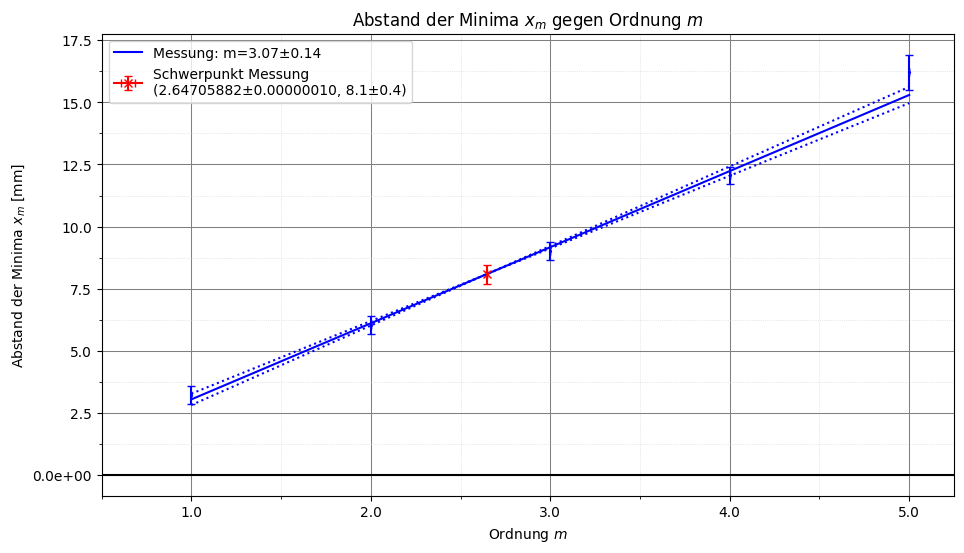

In [18]:
geraden_fit(
    exp_nr='',
    file_n='b_results.csv',
    title=r'Abstand der Minima $x_m$ gegen Ordnung $m$',
    x_label=r'Ordnung $m$',
    y_label=r'Abstand der Minima $x_m$ [mm]',
    save=True,
    length=11,
    height=6,
    x_axis=0,
    y_axis=0,
    x_min=0.5,
    x_major_ticks=1,   # Hauptticks alle 10 Einheiten
    x_minor_ticks=0.5,    # Nebenticks alle 1 Einheit
    y_major_ticks=2.5,
     y_minor_ticks=1.25,
    legendlocation='best',
    y_labels=['Messung'],  # Provide labels for each dataset
    # y_markers=['o'],       # Optional: specify markers
    y_colors=['blue'], # Optional: specify colors
    x_decimal_places=0,
    y_decimal_places=2,
    plot_errors =  True,
    linear_fit=True,
    plot_y_inter=False,
    size = 1.3
)

In [13]:
# Lambda bestimmen

var_names=[m, D, f]=sp.symbols('m D f')
formula=D * m / f
gaussian_error_propagation(formula, ((m,0.00307,0.00014),(D,0.1 * 10**(-3),0.001 * 10**(-3)),(f,0.5,0)))

Formel: D*m/f
Werte: ((m, 0.00307, 0.00014), (D, 0.0001, 1e-06), (f, 0.5, 0)) 

Formelwert: 6.14000000000000E-7

Fehlerformel: sqrt((D*del_m/f)**2 + (del_D*m/f)**2)
Fehler: 2.86653030683438E-8 
Ergebnis: 6.1e-07±3e-08
Das Ergebnis hat eine Genauigkeit von 4.918%


In [14]:
# 368.c

var_names=[b, g, B]=sp.symbols('b g B')
formula=g * B / b
gaussian_error_propagation(formula, ((g,10,0.3),(B,2.5,0.1),(b,235,0.5)))

# d_0 Ergebnis in cm

Formel: B*g/b
Werte: ((g, 10, 0.3), (B, 2.5, 0.1), (b, 235, 0.5)) 

Formelwert: 0.106382978723404

Fehlerformel: sqrt((B*del_g/b)**2 + (del_B*g/b)**2 + (-B*del_b*g/b**2)**2)
Fehler: 0.00532396264659985 
Ergebnis: 0.106±0.005
Das Ergebnis hat eine Genauigkeit von 4.717%
